# Introductory Quantum Mechanics / Structured Programming Coursework

- **This coursework is worth 10% of your final mark for PX2132 and 25% of your final mark for PX2134.**
- **The deadline for submitting this work is Friday 2pm Week 7 (19th November).**
- **Please upload your Jupyter notebook via turnitin to the PX2132 assignment, and via PX2134's GitHub classroom.**
- **Upload a .pdf version of your work via turnitin to the PX2134 assignment**.
- Your submitted work must abide by university regulations regarding plagiarism. You are encouraged to discuss the work with your classmates, but your submitted work must be written by you alone. You are welcome to copy and paste code from online sources, but you must cite your sources.
- You **have** to use functions, define them properly with sensible signatures, and include detailed comments throughout your code.

## 1 Time evolution of infinite potential well states
In PX2132 lecture 2 we met the infinite potential well defined by the potential

$$
  V(x) =
    \begin{cases}
      0 & -L/2<x<L/2\\
      \infty & \text{otherwise.}
    \end{cases} \tag{1}
$$

Although you do not need to show it here, from lecture 3 you should be able to show that the energy eigenvalues $E_n$ and eigenfunctions $\psi_n(x, t)$ are:


\begin{align*}
  \psi_n(x,t)&=
    \begin{cases}
      \sqrt\frac{2}{L}\cos\left(\frac{n\pi x}{L}\right)\exp(iE_n t / \hbar) & n\,\text{odd}\\
      \sqrt\frac{2}{L}\sin\left(\frac{n\pi x}{L}\right)\exp(iE_n t / \hbar) & n\,\text{even}
    \end{cases}\tag{2}\\
E_n&=\frac{\hbar^2n^2\pi^2}{2mL^2.}\tag{3}
\end{align*}


For simplicity let's choose units such that

$$
\hbar=m=L=1.\tag{4}
$$

These solutions are defined for continuous values of $x$. For subsequent questions, on the computer you will need to discretize space into a finite number of poistions, $N$. Something like $N=1000$ should give nice results in a reasonable time, but leave $N$ as a specified variable in your code.

**Q.1.1 [1 mark]** How many energy eigenstates must there be in this numerical problem?

***As this is a numerical solution rather than an analytic, it is limited by the number of positions so there is 1000 eigenstates**

**Q1.2 [3 marks]** Plot the real parts of the first 3 energy eigenstates at time $t=0$. Offset them along the y-axis by their respective energies.

In [1]:
#importing functions required for calculations, curve_fit and animatingn 
import numpy as np
from numpy import e
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.animation import FuncAnimation
from IPython import display

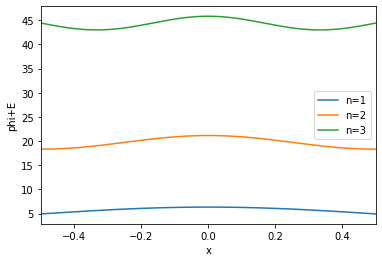

In [2]:
#creating an array of x values
x=np.linspace(-0.5,0.5,1000)

#calculating the offset eigenstates of the first three energy levels
p1=np.sqrt(2)*np.cos(np.pi*x)+np.pi**2/2
p2=np.sqrt(2)*np.cos(2*np.pi*x)+4*np.pi**2/2
p3=np.sqrt(2)*np.cos(3*np.pi*x)+9*np.pi**2/2

#plotting the energy eigenstates against x
plt.plot(x,p1,label="n=1")
plt.plot(x,p2,label="n=2")
plt.plot(x,p3,label="n=3")

plt.xlim(-0.5,0.5)
plt.xlabel("x")
plt.ylabel("phi+E")
plt.legend()

**Q1.3 [4 marks]** Create an animation for the first 3 energy eigenstate wavefunctions. Show the full complex behaviour using axes $x, \text{Real}(\psi_n(x,t)), \text{Imag}(\psi_n(x,t))$. Let your animation run over 10 periods of the $\psi_1$ oscillation.

In [3]:
# creating constant -i
a=complex(0,1)

#creating function which takes the variable n and calculates the wavefunctions over an array of time and position
def phi(x,t,n):
  if n%2==0:
    yn=np.sqrt(2)*np.cos(n*np.pi*x)*e**(a*n**2*np.pi**2*t/2)
  else:
    yn=np.sqrt(2)*np.sin(n*np.pi*x)*e**(a*n**2*np.pi**2*t/2)
  return yn

#period of the first eigenstate
T=1/(np.pi**2/2)

In [4]:
#creating empty plot
fig = plt.figure()
ax=plt.axes(projection='3d')

#generating 3 lines with empty data sets for the first 3 energy levels
line1, =ax.plot3D(xs=[],ys=[],zs=[],label='n=1',color='red')
line2, =ax.plot3D(xs=[],ys=[],zs=[],label='n=2',color='blue')
line3, =ax.plot3D(xs=[],ys=[],zs=[],label='n=3',color='green')

#setting axis limits to make it easier to see the graph
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-2.5,2.5)
ax.set_zlim(-10,10)

#adding labels and legend to the three axes
plt.xlabel("x")
plt.ylabel("real")
ax.set_zlabel("imaginary")
plt.legend()

#create animate function which takes a variable frame_num and returns the data for the three lines above
#the data is the time evolution of wavefunction against x (real and imag)
def animate(frame_num):
  phi_1=phi(x,0.01*T*frame_num,1)
  phi_2=phi(x,0.01*T*frame_num,2)
  phi_3=phi(x,0.01*T*frame_num,3)

  z1=(phi_1.real,phi_1.imag)
  z2=(phi_2.real,phi_2.imag)
  z3=(phi_3.real,phi_3.imag)

  line1.set_data_3d(x,phi_1.real,phi_1.imag)
  line2.set_data_3d(x,phi_2.real,phi_2.imag)
  line3.set_data_3d(x,phi_3.real,phi_3.imag)

  return line1,line2,line3

#animating this data for 1000 frames and an interval of 20
anim=FuncAnimation(fig,animate,frames=1000,interval=20)

video=anim.to_html5_video()
html=display.HTML(video)
display.display(html)
plt.close()

**Q1.4 [1 mark]** Explain why the probability densities $\rho_n$ of the energy eigenstates, $\rho_n(x)=|\psi_n(x,t)|^2$, are time independent.

***The modulus squared of $\phi(x) exp(-iE_nt)$ is always time independent as the exponential term will cancel with its complex conjugate. This is the result of the modulus squared being the same as the $\psi_n(x,t)$ multiplied by its complex conjugate.**

**Q1.5** In PX2132 lecture 4 we saw that any wavefunction matching the boundary conditions can be written as a sum of energy eigenstates. Consider the normalized top hat function

$$
  f(x)=
    \begin{cases}
      \alpha^{-1/2},& x_0-\frac{\alpha}{2}\leq x \leq x_0+\frac{\alpha}{2}\\
      0,& \text{otherwise.}\tag{5}\label{eq:tophat}
    \end{cases}
$$

Although you do not need to show it here, by the reasoning in Lecture 4 you should be able to show that the subsequent time evolution of this state is

$$
    f(x,t)=\sum^{\infty}_{n=1}f_n\psi_n(x,t)\tag{6}\label{eq:tophat_fourier}
$$

where

$$
  f_n=
    \begin{cases}
      \sqrt\frac{8L}{\alpha}\frac{1}{n\pi}\cos\left(\frac{n\pi x_0}{L}\right)\sin\left(\frac{n\pi \alpha}{2L}\right),& n\,\text{odd}\\
      \sqrt\frac{8L}{L\alpha}\frac{1}{n\pi}\sin\left(\frac{n\pi x_0}{L}\right)\sin\left(\frac{n\pi \alpha}{2L}\right),& n\,\text{even.}
    \end{cases}\tag{7}
$$

**(i) [2 marks]** What limits are imposed on $x_0$ and $\alpha$ by the boundary conditions?


***As from the top hat function being not constantly zero, fn cannot be 0 either as this would result in the sum also being 0. As a result, $x_0$ cannot be m, $\frac{m}{2}$, 0 and $\alpha$ cannot be m, 0. m is a positive arbitary integer (odd for $x_0$ and even for $\alpha$)**

**(ii) [1 mark]** Eq (6) is an analytic (rather than numerical) result. With $N$ positions in your numerical code, how many terms will there be in the numerical sum?

***As this is a numerical solution, it is limited by the number of points. As a result it will have N terms in the sum.**

**(iii) [3 marks]** Animate $|f(x,t)|^2$ to see the subsequent time evolution, for a few values of $x_0$ and $\alpha$.

In [5]:
#defining function which takes a vzariable t and two settable constants and returns an array of x values and the modulus squared of the wavefunction
def fxt(t,x0,alpha):
  
  x=np.linspace(x0-alpha/2,x0+alpha/2,1000)
  ft=np.zeros(1000)
  ft[0]=0
  p=np.zeros(1000)
  p[0]=0
  for i in range(1,1000):
    
    if np.min(x)<=x[i-1] or x[i-1]<=np.max(x):
      p=1/np.sqrt(alpha)*e**(a*np.pi**2*t/2)
    else:
      fx=0
      ft[i-1]=0
      p[i-1]=0


    p_abs=abs(p)
    p_abs_sq=p_abs**2
    return x,p_abs_sq

In [6]:
#Creating empty figure with set axes limits
fig = plt.figure()
ax=plt.axes()

ax.set_xlim(-3,5)
ax.set_ylim(0,5)

#setting 3 empty lines
line1, =ax.plot([],label='test values',color='blue')
line2, =ax.plot([],label='alpha=0.5 X0=1/4',color='black')
line3, =ax.plot([],label='alpha=5 X0=1/4',color='red')

#creating animate function to return the data of the modulus squared of the eigenstate for different values of x0 and alpha
def animate(frame_num):

  y1=np.zeros(1000)
  y2=np.zeros(1000)
  y3=np.zeros(1000)

  y1=fxt(0.0001*frame_num, 1, 5)
  y2=fxt(0.0001*frame_num, 1/4, 0.5)
  y3=fxt(0.0001*frame_num, 1/4, 5)

  line1.set_data(y1[0],y1[1])
  line2.set_data(y2[0],y2[1])
  line3.set_data(y3[0],y3[1])

  return [line1,line2,line3]

#labelling axes, generating legend and animating lines with frames between 1 and 1000
plt.xlabel("x")
plt.ylabel("mod squared")
plt.legend()

anim=FuncAnimation(fig,animate,frames=1000,interval=20)

video=anim.to_html5_video()
html=display.HTML(video)
display.display(html)
plt.close()

**(iv) [2 marks]** By plotting $f(x,t=0)$ for a few values of $N$, on the same axes, find the smallest value which you think gives a decent approximation to the top hat function of Eq. [5](#mjx-eqn-eq:tophat).

Text(0, 0.5, 'f(x)')

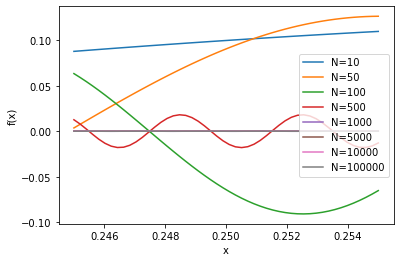

In [28]:
#defining function which takes array x, and variables N,alpha,x0 and returns the sum of the odd and even functions at t=0
def fx(x,N,alpha,x0):
  fn=np.zeros(N)
  phix=np.zeros(N)
  fxe=np.zeros(N)
  fxo=np.zeros(N)

  for i in range(1,N):
    if i%2==0:
      fn[i-1]=np.sqrt(8/alpha)*1/(i*np.pi)*np.cos(i*np.pi*x0)*np.sin(i*np.pi*alpha/2)
      phix=np.sqrt(2)*np.sin(i*np.pi*x)
      fxe=fn[i-1]*phix
    else:
      fn[i-1]=np.sqrt(8/alpha)*1/(i*np.pi)*np.sin(i*np.pi*x0)*np.sin(i*np.pi*alpha/2)
      phix=np.sqrt(2)*np.cos(i*np.pi*x)
      fxo=fn[i-1]*phix
    if i > np.max(N):
      break
  return fxe+fxo

#setting different N values
N1=10
N2=50
N3=100
N4=500
N5=1000
N6=5000
N7=10000
N8=50000

#generating x array and eigenstates for these N values
x=np.linspace(1/4-0.01/2,1/4+0.01/2)
y1=fx(x,N1,0.01,1/4)
y2=fx(x,N2,0.01,1/4)
y3=fx(x,N3,0.01,1/4)
y4=fx(x,N4,0.01,1/4)
y5=fx(x,N5,0.01,1/4)
y6=fx(x,N6,0.01,1/4)
y7=fx(x,N7,0.01,1/4)
y8=fx(x,N8,0.01,1/4)

#plotting x array and y array for the different N values
plt.plot(x,y1,label="N=10")
plt.plot(x,y2, label="N=50")
plt.plot(x,y3,label="N=100")
plt.plot(x,y4,label="N=500")
plt.plot(x,y5,label="N=1000")
plt.plot(x,y6,label="N=5000")
plt.plot(x,y7,label="N=10000")
plt.plot(x,y8, label="N=100000")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("f(x)")
#After N=1000, there is no detetctable difference for an increase in N. Whilst it looks like the N=1000 line is at zero, this is not the case and is due to the scale of the N=10 against N=1000

**(v) [3 marks]** 

At time $t=0$ you know the wavefunction to be a top hat function with $x_0=L/4$ and $\alpha=0.01L$. The probability to find the particle in the region $L/4-0.01L<x<L/4+0.01L$ is therefore 1. Plot the probability of finding the particle in this region for subsequent times. Remember that the probability density $\rho_n$ is a density. As such, it needs to be integrated over the relevant range of positions to give the probability of finding the particle in that range.

Text(0, 0.5, 'probability')

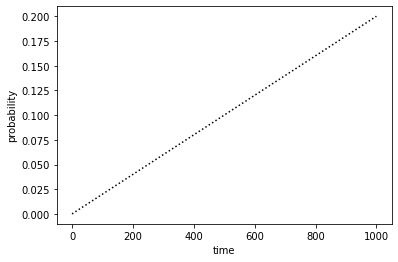

In [9]:
#define function f(t) to return the array of probability density
def f(t):
  E=np.pi**2/2
  return abs(e**(-1j*E*t/h))**2

#length of the integral range for Monte Carlo
L=m=h=1
length=(L/4+0.01*L)-(L/4-0.01*L)
N=1000

#setting time array
t=np.linspace(0,1000,1000)

#creating array of probability densaities at time t
n=f(t)

#generate integral array of cumulative sums of the monte carlo integration 
alpha=0.01*L
integral=np.cumsum((alpha**-0.5)*(n/N)*length)

#plotting integral against time
plt.plot(t,integral,'k:')
plt.xlabel('time')
plt.ylabel("probability")

## 2 Exact diagonalisation

In PX2132 lecture 4 we saw that the TISE for the finite potential well cannot be solved analytically. We can solve any problem in quantum mechanics using 'exact diagonalisation'. The TISE is an eigenvalue problem, and we can simply diagonalise the Hamiltonian to find the eigenvalues and eigenvectors.
The TISE reads

$$
\hat{H}\phi_n=E_n\phi_n \tag{8}
$$

or in 1D

$$
\left(-\frac{\hbar^2}{2m}\frac{\mathrm{d}^2}{\mathrm{d}x^2}+\hat{V} \right)\phi_n(x)=E_n\phi_n(x).\label{TISE1D}\tag{9}
$$

This time we will define a potential

$$
  V(x) =
    \begin{cases}
      0 & -L/2<x<L/2\\
      V_0 & \text{otherwise.}
    \end{cases}\label{potential}\tag{10}
$$

Let's again choose units such that

$$
\hbar=m=L=1.\tag{11}
$$

The wavefunctions will extend beyond the end of the well. On a computer $x$ will be discrete, taking $n$ values. Call these $x_i$, with $1\leq i \leq N$. Since $x$ is now a list of $N$ numbers it is reasonable to think of it as an $N\times 1$ vector:

$$
x=
 \begin{pmatrix}
  x_1 \\
  x_2 \\
  \vdots  \\
  x_n.
 \end{pmatrix}\tag{12}
$$


**Q2.1**
**(i) [1 mark]** Thinking about the solutions for the bound states in the finite potential well, what must go wrong with any numerical simulation at $x_1$ and $x_N$?

***As the x values are not continuous between the boundary points, the boundary conditions will not be upheld so the finite potential well cannot be accurately modelled at these two points.**

**(ii) [1 mark]** This is not too much of a problem provided we leave enough space between the ends of the well and $x_1$ and $x_N$. Why not?

***If the first and last x positions are far enough from the well boundaries then it is possible to manipulate the start, end and x interval to allow the boundary conditions to be upheld.**

**(iii) [1 mark]** Let's relabel $\phi_n(x_i)$ to $\phi_n^i$. Explain why it is reasonable to think of $\phi_n(x)$ as a $N\times 1$ vector for each $n$ separately.

***As the function $\phi_n$(x) is the position eigenvector, composed from a matrix with dimensions of N X 1. As such, the term can be thought of as an N X 1 vector, where N is the total series of n values**

**(iv) [1 mark]** With a finite $N$, Eq. [9](#mjx-eqn-TISE1D) is just a matrix eigenvalue problem. What are the dimensions of the object in parentheses?

***If the equation is taken to be a simple matrix eigenvalue equation, then the dimensions of this term must be inverse of the $\phi_n$(x) term. As such it has the dimensions 1 X N.**

**Q2.2** The second derivative of a function $\phi(x)$ can be approximated numerically using the formula

$$
\phi''(x)\approx\frac{\phi(x+h)-2\phi(x)+\phi(x-h)}{h^2}\label{secondd}\tag{13}
$$

where $h$ is the fixed spacing between neighbouring discrete positions $x_{i+1}$ and $x_i$.

**(i) [1 mark]** By Taylor expanding the right hand side of Eq. [13](#mjx-eqn-secondd) verify that this expression returns the second derivative in the limit $h\to0$.

***Substitute x(i+1), x_i and x(i-1) for x+h, x and x-h respectively
$$\frac{\frac{\phi(x(i+1))-\phi(x_i)}{h}-\frac{\phi(x_i)-\phi(x(i-1))}{h}}{h}$$
as h tends to 0, the interval h tends to dx, and the difference between the two gradients with seperation h become d$\phi(x)$ for both numerator fractions
as a result the two numerator fractions become two gradients of $\phi(x)$ with a seperation of dx.
The above equation becomes:
$$\frac{\frac{d(\phi(x))}{dx}-\frac{d\phi(x)}{dx}}{dx}$$
Which due to the infinitesimal nature of dx, gives:
$$\frac{d^2\phi(x)}{dx^2}$$
This is a second order derivative of $\phi(x)$ with respect to x**

**(ii) [2 marks]** By thinking of $\mathrm{d}^2/\mathrm{d}x^2$ as a matrix acting on the vector $\phi_n$, explain why, for sites $x_1<x<x_N$,

$$
\frac{\mathrm{d}^2\phi_n}{\mathrm{d}x^2} \approx \frac{1}{h^2}
 \begin{pmatrix}
    -2 & 1 & 0 & \cdots & 0 \\
    1 & -2 & 1 &  & 0 \\
    0 & 1 & -2 & \ddots & \vdots \\
    \vdots  & & \ddots & \ddots & 1  \\
    0 & 0 & \cdots & 1 & -2 
 \end{pmatrix}
  \begin{pmatrix}
    \phi_n^1 \\
    \phi_n^2 \\
    \phi_n^3 \\
    \vdots  \\
    \phi_n^N 
 \end{pmatrix}.\tag{14}
$$

***The term $\frac{d^2}{dx^2}$ can be thought of as a matrix acting upon the vector $\phi_n$ as the matrix multiplication will lead to terms in the form of the equation in 2.2.i, e.g:
$$\frac{\phi_n^(i-1) - 2\phi_n^(i) + \phi_n^(i+1)}{h^2}$$
This is the approximation of the second order derivative for a non-continuous position array. Assuming that h tends to 0, then the accuracy of the approximation increases. This is true for all values of $\phi$ except $x_1$ and $x_2$**

**This equation will give the second order derivative of all points from i-1=1 and i+1=N-1, as such the second derivative of the positions in the stated range.**

**(iii) [1 mark]** What new problem arises at sites $x_1$ and $x_N$?

*** At x1 and xn the equation will give, $$\frac{-2\phi_n^1+\phi_n^2}{h^2}$$ or $$\frac{\phi_n^(N-1)-2\phi_n^N}{h^2}$$
The two equations will not give the same approximation of the second derivative from Taylor expansion so does not represent the difference of two gradients with a known seperation or the second derivative. As such this matrix does not uphold at these two sites.**

**(iv) [2 marks]** Explain why the matrix form of $\hat{V}$ should be diagonal.

***If the matrix form was not diagonal then the multiple of V and the eigenvector would return a multi-term sum of potentials, e.g
$$V(X_1)\phi_n^1+V(X_2)\phi_n^2$$
This will then be summated with the differential matrix which for this example would be $\frac{d^2\phi_n^1}{dx^2}$ which would give a term with a differential just in terms of x1 but a potential in terms of both x1 and x2. The RHS of the TISE would also give an answer independent of x2, as such these two sides would no longer be equivalent. This shows the matrix has to be a diagonal.**

**Q2.3** Putting this all together, we see that if we construct the matrix

$$
-\frac{\hbar^2}{2m}\frac{1}{h^2}
 \begin{pmatrix}
    -2 & 1 & 0 & \cdots & 0 \\
    1 & -2 & 1 &  & 0 \\
    0 & 1 & -2 \ddots & \vdots \\
    \vdots  & & \ddots & \ddots & 1  \\
    0 & 0 & \cdots & 1 & -2 
 \end{pmatrix}
 +
 \begin{pmatrix}
    V(x_1) & 0 & 0 & \cdots & 0 \\
    0 & V(x_2) & 1 &  & 0 \\
    \vdots & 0 & V(x_3) & \ddots & \vdots \\
    \vdots  & & \ddots & \ddots & 0  \\
    0 & 0 & \cdots & 0 & V(x_N) 
 \end{pmatrix}\tag{15}
$$

its eigenvalues must be $E_n$ and its normalised eigenvectors must be $\phi_n(x)$. You can use the python code:

In [ ]:
H = [[1,0],[0,1]]
E, phi = np.linalg.eigh(H)

to diagonalise the matrix $H$ (here the identity matrix as a placeholder) to give its eigenvalues and normalised eigenvectors. Note that from the [documentation for np.linalg.eigh](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html):
```
The column phi[:, i] is the normalized eigenvector corresponding to the eigenvalue E[i]
```
**(i) [5 marks]** Set $V_0=100$ in [10](#mjx-eqn-potential). Plot $V(x)$ and the real part of $\phi_n(x)$ for the lowest three energy eigenstates. Offset the $\phi_n(x)$ vertically by their energies. Note: now that the well is finite, make sure you use a wide enough range of values for $x$.

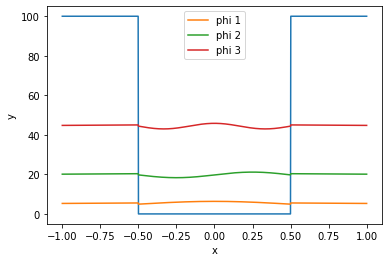

In [10]:
#define function which takes array of x, potential=V0 and L=1 returning the potential at position x
def V(x,v0,L=1):
  if abs(x)>(L/2):
    return v0
  else:
    return 0
h=1
m=1
L=1

#define energy function taking array of n and returns energy at these values
def E(n):
  En=((h**2)*n**2*np.pi**2)/(2*m*L**2)
  return En

#define function taking n array, v0, positions and L=1 returning phi n of x
def phi(n,v_0,x,L=1):
  if E(n)<v_0:
    if x>L/2:
      return e**(-x)
    elif x< -L/2:
      return e**(x)
    elif (n%2==0):
      return np.sqrt(2)*np.sin(n*np.pi*x)
    else:
      return np.sqrt(2)*np.cos(n*np.pi*x)
  else:
    if (n%2==0):
      return np.sqrt(2)*np.sin(n*np.pi*x)
    else:
      return np.sqrt(2)*np.cos(n*np.pi*x)

#generate array of position and potential
x=np.linspace(-1,1,1000)
y=np.array([V(i,v0=100) for i in x])

#plot positions against potential
plt.plot(x,y)

#generate and plot wavefunctions offset by E against position
wave=np.array([phi(1,100,i)for i in x])
plt.plot(x,wave+E(1),label="phi 1")
wave=np.array([phi(2,100,i)for i in x])
plt.plot(x,wave+E(2),label="phi 2")
wave=np.array([phi(3,100,i)for i in x])
plt.plot(x,wave+E(3),label="phi 3")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='best')

**(ii) [2 marks]** Now set $V_0=20$. What happened to $\phi_3(x)$?

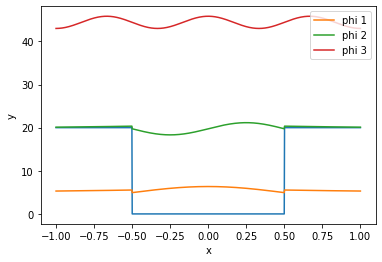

In [12]:
x=np.linspace(-1,1,1000)

#setting potential array with V0=20
y=np.array([V(i,v0=20) for i in x])

#plot position and potential
plt.plot(x,y)

#generate and plot offset wave against position for new V0
wave=np.array([phi(1,20,i)for i in x])
plt.plot(x,wave+E(1),label="phi 1")
wave=np.array([phi(2,20,i)for i in x])
plt.plot(x,wave+E(2),label="phi 2")
wave=np.array([phi(3,20,i)for i in x])
plt.plot(x,wave+E(3),label="phi 3")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='best')

#phi 3 is now outside of the well

**Q2.4 [3 marks]** Your code should give the energy eigenvalues and eigenstates of any potential you care to specify. Play around with it and give an interesting example of your choice here.

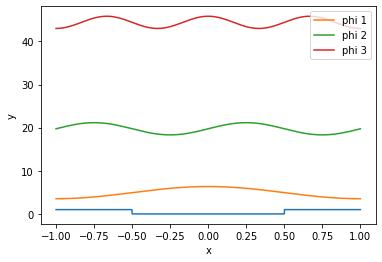

In [13]:
#repeat steps in 2.2,2.3 with a new potential of 1
x=np.linspace(-1,1,1000)
y=np.array([V(i,v0=1) for i in x])
plt.plot(x,y)
wave=np.array([phi(1,1,i)for i in x])
plt.plot(x,wave+E(1),label="phi 1")
wave=np.array([phi(2,1,i)for i in x])
plt.plot(x,wave+E(2),label="phi 2")
wave=np.array([phi(3,1,i)for i in x])
plt.plot(x,wave+E(3),label="phi 3")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='best')